# Домашнее задание

В этом домашнем задании предлагаем вам попрактиковаться в прогнозировании стоимости биткоина при помощи линейной регрессии.

In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
from dateutil import parser
import mplfinance as fplt

In [13]:
data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

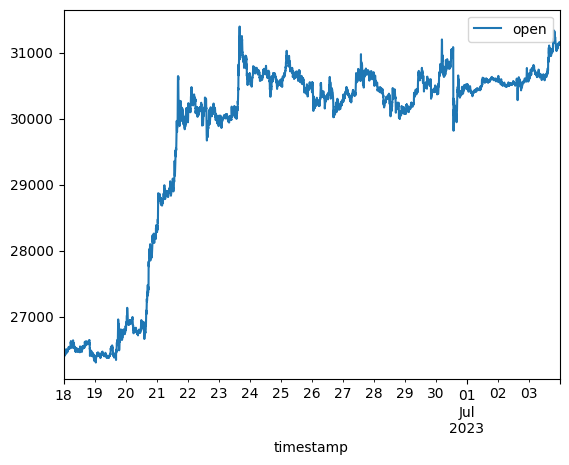

In [14]:
# data = data[['open']]

data[['open']].plot()
plt.show()

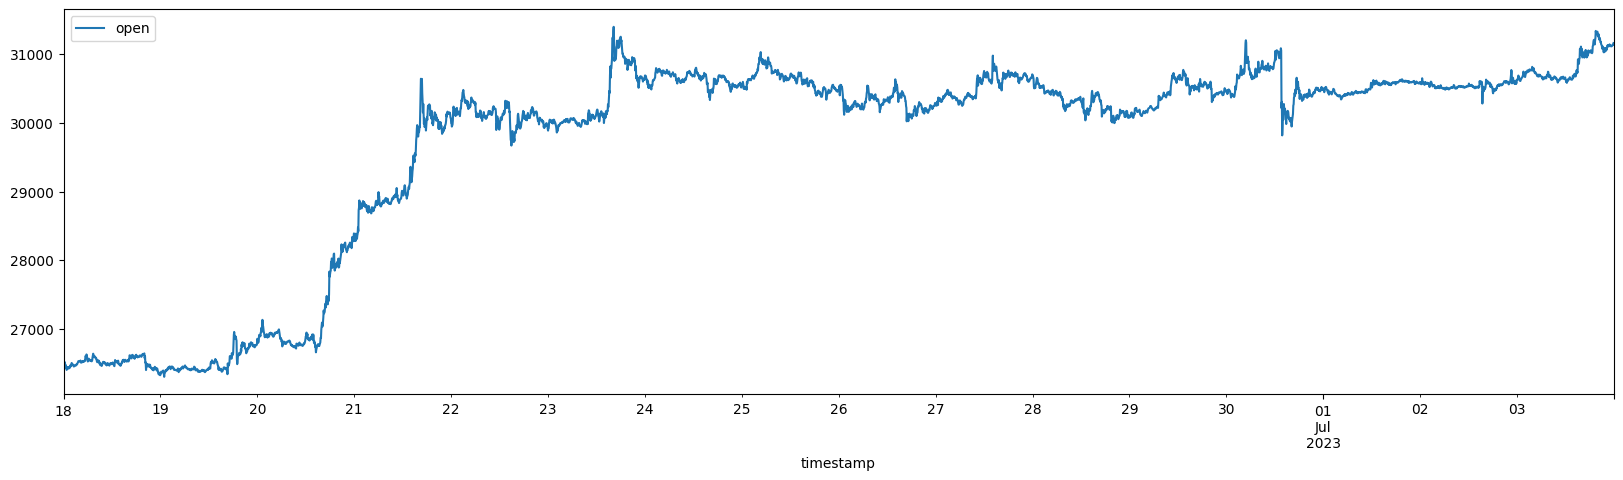

In [15]:
data[['open']].plot(figsize=(20,5));

In [16]:
data.index[0:24*12]

DatetimeIndex(['2023-06-18 00:00:00', '2023-06-18 00:05:00',
               '2023-06-18 00:10:00', '2023-06-18 00:15:00',
               '2023-06-18 00:20:00', '2023-06-18 00:25:00',
               '2023-06-18 00:30:00', '2023-06-18 00:35:00',
               '2023-06-18 00:40:00', '2023-06-18 00:45:00',
               ...
               '2023-06-18 23:10:00', '2023-06-18 23:15:00',
               '2023-06-18 23:20:00', '2023-06-18 23:25:00',
               '2023-06-18 23:30:00', '2023-06-18 23:35:00',
               '2023-06-18 23:40:00', '2023-06-18 23:45:00',
               '2023-06-18 23:50:00', '2023-06-18 23:55:00'],
              dtype='datetime64[ns]', name='timestamp', length=288, freq=None)

In [19]:
data['date'] = data.index.date

In [217]:
data['idx'] = np.arange(len(data))

In [218]:
data

,open,high,low,close,volume,date,idx
timestamp,,,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498,2023-06-18,0
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262,2023-06-18,1
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461,2023-06-18,2
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364,2023-06-18,3
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204,2023-06-18,4
...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31126.23,31163.0,31118.99,31126.93,24.7985,2023-07-03,4603
2023-07-03 23:40:00,31127.02,31163.0,31120.30,31136.55,28.1264,2023-07-03,4604
2023-07-03 23:45:00,31136.55,31156.0,31120.30,31134.78,44.0049,2023-07-03,4605


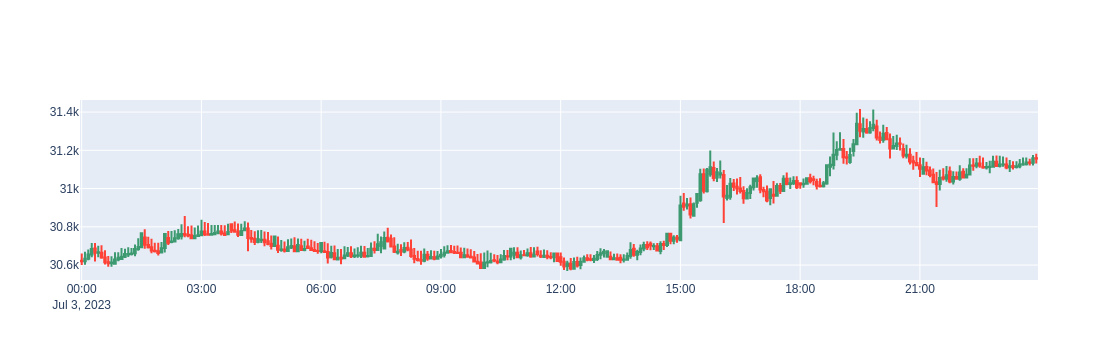

In [219]:
data_date_req = (data['date']==parser.parse('2023-07-03').date())
data_date = data[data_date_req]

fig = go.Figure(data=[go.Candlestick(x=data_date.index,
                open=data_date['open'], high=data_date['high'],
                low=data_date['low'], close=data_date['close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

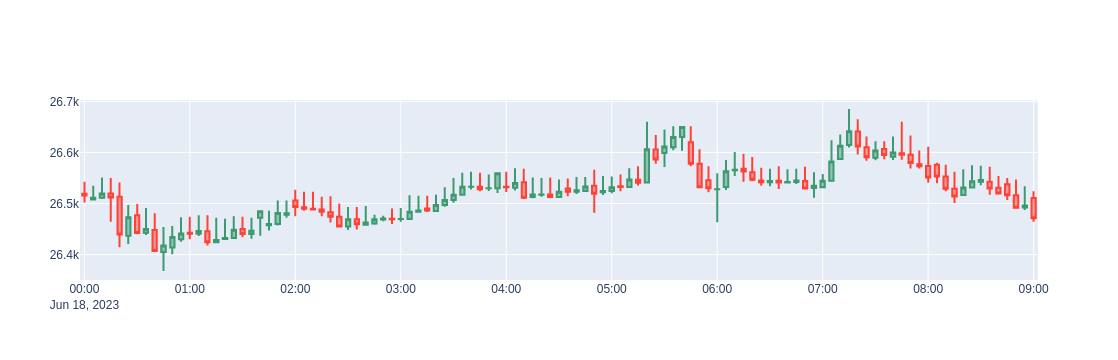

In [220]:
start = parser.parse('2023-06-18 00:00:00')
end   = parser.parse('2023-06-18 09:00:00')

fig = go.Figure(data=[go.Candlestick(x=data[start:end].index,
                open=data[start:end]['open'], high=data[start:end]['high'],
                low=data[start:end]['low'], close=data[start:end]['close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

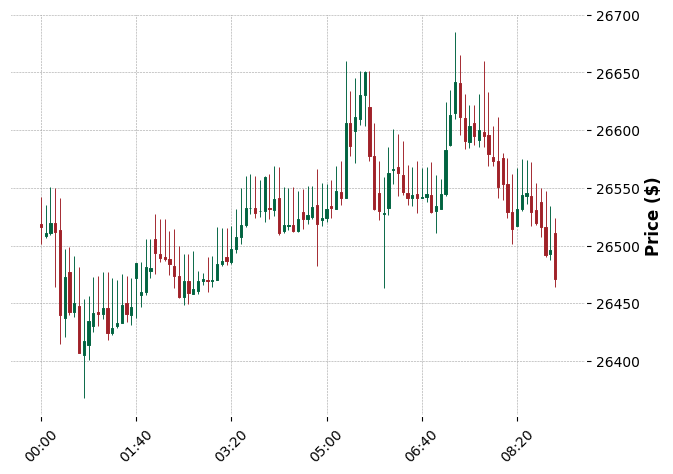

In [221]:
fplt.plot(data[start:end],
          type='candle',
          style='charles',
          ylabel='Price ($)'
         )

In [222]:
data

,open,high,low,close,volume,date,idx
timestamp,,,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498,2023-06-18,0
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262,2023-06-18,1
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461,2023-06-18,2
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364,2023-06-18,3
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204,2023-06-18,4
...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31126.23,31163.0,31118.99,31126.93,24.7985,2023-07-03,4603
2023-07-03 23:40:00,31127.02,31163.0,31120.30,31136.55,28.1264,2023-07-03,4604
2023-07-03 23:45:00,31136.55,31156.0,31120.30,31134.78,44.0049,2023-07-03,4605


Проделайте следующие шаги:

* Разбейте данные на тренировочную и тестовую часть. В тест отправьте 15% данных

* Извлеките лаговые признаки

* Извлеките агрегированные признаки (средняя стоимость за день, час)

Рекомендуется использовать функцию preprocess_data с вебинара (однако, надо будет незначительно ее поменять, исходя из данных задачи).

Задайте гиперпараметры по умолчанию (в функции preprocess_data, если будете использовать ее):
* `lag_start`=5
* `lag_end`=20
* `test_size`=0.15

In [223]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [224]:
# code_mean(data, 'date', 'open')

In [225]:
int(len(data)*(1 - 0.15))

3916

In [226]:
def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):
    data = pd.DataFrame(data.copy())
    
    for i in range(lag_start, lag_end):
        data[f"open_lag_{i}"] = data['open'].shift(i)

    data_dropna = data.dropna()
    data_dropna_ix_cut = int(len(data_dropna)*(1 - test_size))
    data_dropna_time_cut = data_dropna.index[data_dropna_ix_cut]
    
    # X_train = data_dropna.loc[:data_dropna_time_cut].drop(["open"], axis=1)
    # y_train = data_dropna.loc[:data_dropna_time_cut]["open"]
    # X_test = data_dropna.loc[data_dropna_time_cut:].drop(["open"], axis=1)
    # y_test = data_dropna.loc[data_dropna_time_cut:]["open"]

    # return X_train, X_test, y_train, y_test
    return data
    # return data_dropna

In [554]:
# считать только от lag_star`a и до lag_end`a (или глубже в прошлое, если возможно)

def calc_SMA(data, type, lag_start=5, lag_end=20):
    data = pd.DataFrame(data.copy())
    data[f'{type}_SMA'] = np.nan
    data[f'{type}_WSMA'] = np.nan
    for i in range(lag_end, len(data)+1):
        data.loc[data.index[i-1], f'{type}_SMA'] = data_preproc.iloc[i-lag_end:i-lag_start][type].mean()
        open_weighted = []
        counter = 1
        for j in range(i-lag_end, i-lag_start):
            open_weighted.append(np.log(counter)*data_preproc.iloc[j][type])
            counter += 2
        data.loc[data.index[i-1], f'{type}_WSMA'] = np.mean(open_weighted)
    # for i in range(lag_end-1, len(data)):
    #     data.loc[data.index[i], f'{type}_SMA'] = data_preproc.iloc[i-lag_end+1:i-lag_start+1][type].mean()
    return data

def calc_RSI(data, lag_start=5, lag_end=20):
    data = pd.DataFrame(data.copy())
    data['mean_lag_gain'] = np.nan
    data['mean_lag_loss'] = np.nan
    data['RSI'] = np.nan
    data = data.assign(delta=data['close']-data['open'])
    for i in range(lag_end, len(data)+1):
        mean_lag_gain = 0
        sum_lag_gain = data_RSI.iloc[i-lag_end:i-lag_start][data_RSI.iloc[i-lag_end:i-lag_start]['delta']>0]['delta'].values.sum()
        if sum_lag_gain > 0:
            mean_lag_gain = sum_lag_gain/len(data_RSI.iloc[i-lag_end:i-lag_start][data_RSI.iloc[i-lag_end:i-lag_start]['delta']>0])
        mean_lag_loss = 0
        sum_lag_loss = data_RSI.iloc[i-lag_end:i-lag_start][data_RSI.iloc[i-lag_end:i-lag_start]['delta']<0]['delta'].values.sum()
        if sum_lag_loss < 0:
            mean_lag_loss = sum_lag_loss/len(data_RSI.iloc[i-lag_end:i-lag_start][data_RSI.iloc[i-lag_end:i-lag_start]['delta']<0])
        data.loc[data.index[i-1], 'mean_lag_gain'] = mean_lag_gain
        data.loc[data.index[i-1], 'mean_lag_loss'] = mean_lag_loss
        data.loc[data.index[i-1], 'RSI'] = 100 - (100/(1 + mean_lag_gain/abs(mean_lag_loss)))
    return data

In [542]:
data_RSI = calc_RSI(data, lag_start=2, lag_end=5)

/tmp/ipykernel_26588/2158320091.py:36: RuntimeWarning:

divide by zero encountered in scalar divide



In [543]:
(3.29+8.32)/2

5.805

In [544]:
data_RSI

,open,high,low,close,volume,date,idx,mean_lag_gain,mean_lag_loss,RSI,delta
timestamp,,,,,,,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498,2023-06-18,0,NaN,NaN,NaN,-3.30
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262,2023-06-18,1,NaN,NaN,NaN,3.29
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461,2023-06-18,2,NaN,NaN,NaN,8.32
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364,2023-06-18,3,NaN,NaN,NaN,-7.45
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204,2023-06-18,4,5.805,-3.30,63.756178,-73.81
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31126.23,31163.0,31118.99,31126.93,24.7985,2023-07-03,4603,4.500,-5.32,45.824847,0.70
2023-07-03 23:40:00,31127.02,31163.0,31120.30,31136.55,28.1264,2023-07-03,4604,6.625,-5.32,55.462537,9.53
2023-07-03 23:45:00,31136.55,31156.0,31120.30,31134.78,44.0049,2023-07-03,4605,4.650,0.00,100.000000,-1.77


In [545]:
data_RSI['RSI'].min()

0.0

In [546]:
# data_RSI.loc[data_RSI['delta']>0]
# data_RSI.iloc[6:9][data_RSI['delta']>0]
# data_RSI.iloc[6:9][data_RSI.iloc[6:9]['delta']<0]['delta'].values.mean()
data_RSI.iloc[6:9][data_RSI.iloc[6:9]['delta']<0]['delta'].values.sum()/len(data_RSI.iloc[6:9][data_RSI.iloc[6:9]['delta']<0]['delta'])
# iloc[6:9]

-37.86000000000058

In [547]:
data_RSI.iloc[17-3:17-2][data_RSI.iloc[17-3:17-2]['delta']>0]['delta'].values.sum()/len(data_RSI.iloc[17-3:17-2][data_RSI.iloc[17-3:17-2]['delta']>0])

/tmp/ipykernel_26588/215416432.py:1: RuntimeWarning:

invalid value encountered in scalar divide



nan

In [548]:
for j in range(2, 5):
    print(j)

2
3
4


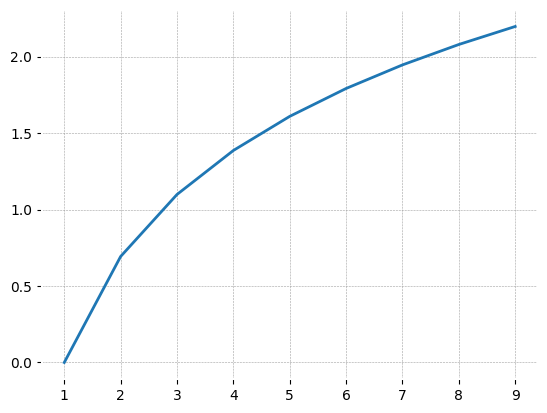

In [555]:
plt.plot(np.arange(10)[1:], np.log(np.arange(10)[1:]))
plt.show()

In [556]:
data_preproc = preprocess_data(data, lag_start=2, lag_end=5)

In [557]:
data_preproc_SMA = calc_SMA(data_preproc, 'open', lag_start=2, lag_end=5)

In [558]:
data_preproc_SMA.iloc[10]

open              26413.75
high               26456.0
low               26400.46
close             26434.54
volume             26.9421
date            2023-06-18
idx                     10
open_lag_2        26447.93
open_lag_3        26442.69
open_lag_4        26477.27
open_SMA      26455.963333
open_WSMA     23872.188476
Name: 2023-06-18 00:50:00, dtype: object

In [559]:
data_preproc_SMA.iloc[6:9]

,open,high,low,close,volume,date,idx,open_lag_2,open_lag_3,open_lag_4,open_SMA,open_WSMA
timestamp,,,,,,,,,,,,
2023-06-18 00:30:00,26477.27,26499.0,26439.73,26442.51,18.2486,2023-06-18,6,26513.33,26519.44,26511.30,26514.690000,23935.380386
2023-06-18 00:35:00,26442.69,26491.0,26438.14,26450.00,24.9993,2023-06-18,7,26437.12,26513.33,26519.44,26489.963333,23892.257792
2023-06-18 00:40:00,26447.93,26481.0,26406.58,26406.97,52.4069,2023-06-18,8,26477.27,26437.12,26513.33,26475.906667,23885.889022


In [503]:
data_preproc_SMA.iloc[11-5:11-2]['open'].mean()

26455.963333333333

In [504]:
data_preproc_SMA

,open,high,low,close,volume,date,idx,open_lag_2,open_lag_3,open_lag_4,open_SMA
timestamp,,,,,,,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498,2023-06-18,0,NaN,NaN,NaN,NaN
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262,2023-06-18,1,NaN,NaN,NaN,NaN
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461,2023-06-18,2,26519.10,NaN,NaN,NaN
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364,2023-06-18,3,26508.01,26519.10,NaN,NaN
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204,2023-06-18,4,26511.30,26508.01,26519.10,26512.803333
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31126.23,31163.0,31118.99,31126.93,24.7985,2023-07-03,4603,31112.99,31118.32,31112.00,31114.436667
2023-07-03 23:40:00,31127.02,31163.0,31120.30,31136.55,28.1264,2023-07-03,4604,31117.26,31112.99,31118.32,31116.190000
2023-07-03 23:45:00,31136.55,31156.0,31120.30,31134.78,44.0049,2023-07-03,4605,31126.23,31117.26,31112.99,31118.826667


In [505]:
(31136.55+31127.02+31126.23)/3

31129.933333333334

In [296]:
data_preproc.iloc[0:50]['open'].mean()

26476.4724

In [115]:
data_preproc['open']

timestamp
2023-06-18 00:00:00    26519.10
2023-06-18 00:05:00    26508.01
2023-06-18 00:10:00    26511.30
2023-06-18 00:15:00    26519.44
2023-06-18 00:20:00    26513.33
                         ...   
2023-07-03 23:35:00    31126.23
2023-07-03 23:40:00    31127.02
2023-07-03 23:45:00    31136.55
2023-07-03 23:50:00    31134.94
2023-07-03 23:55:00    31158.81
Name: open, Length: 4608, dtype: float64

In [63]:
X_train, X_test, y_train, y_test = preprocess_data(data, lag_start=1, lag_end=3)

In [64]:
X_train

,high,low,close,volume,date,open_lag_1,open_lag_2
timestamp,,,,,,,
2023-06-18 00:10:00,26551.0,26508.77,26519.62,18.9461,2023-06-18,26508.01,26519.10
2023-06-18 00:15:00,26550.0,26464.43,26511.99,89.2364,2023-06-18,26511.30,26508.01
2023-06-18 00:20:00,26541.0,26414.28,26439.52,90.0204,2023-06-18,26519.44,26511.30
2023-06-18 00:25:00,26497.0,26420.83,26473.00,45.7398,2023-06-18,26513.33,26519.44
2023-06-18 00:30:00,26499.0,26439.73,26442.51,18.2486,2023-06-18,26437.12,26513.33
...,...,...,...,...,...,...,...
2023-07-01 14:05:00,30602.0,30527.31,30544.86,62.3144,2023-07-01,30564.98,30565.00
2023-07-01 14:10:00,30640.0,30544.91,30556.65,81.4700,2023-07-01,30543.00,30564.98
2023-07-01 14:15:00,30660.0,30547.87,30557.66,77.3869,2023-07-01,30544.91,30543.00


Обучите линейную регрессию с гиперпараметрами по умолчанию на тренировочных данных и вычислите ошибку MAE на тестовых данных.

Чему она получилась равна? (Ответ округлите до целого числа).

Также нарисуйте график правильного ответа и прогноза на тесте.

In [ ]:
# your code here

Попробуйте подобрать гиперпараметры `lag_start`, `lag_end`, а также придумать новые полезные агрегрированные признаки для улучшения качества прогноза.

Пропорции разбиения (в тесте 15% данных) не трогайте. Ошибку MAE все так же считайте на тесте.

In [ ]:
# your code here